In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:\Machine Learning\Playing with Libraries\Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True, axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [4]:
df.isna().sum()
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
df = pd.concat([df, pd.get_dummies(df['Sex'])],axis=1)
df = pd.concat([df, pd.get_dummies(df['Embarked'])],axis=1)
df.drop(columns=["Sex", "Embarked","Parch","SibSp"], inplace=True, axis=1)
bina = {False:0, True:1}
df["female"] = df["female"].apply(lambda x: bina[x])
df["male"] = df["male"].apply(lambda x: bina[x])
df["C"] = df["C"].apply(lambda x: bina[x])
df["Q"] = df["Q"].apply(lambda x: bina[x])
df["S"] = df["S"].apply(lambda x: bina[x])
df

,PassengerId,Survived,Pclass,Age,Fare,female,male,C,Q,S
0,1,0,3,22.000000,7.2500,0,1,0,0,1
1,2,1,1,38.000000,71.2833,1,0,1,0,0
2,3,1,3,26.000000,7.9250,1,0,0,0,1
3,4,1,1,35.000000,53.1000,1,0,0,0,1
4,5,0,3,35.000000,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,13.0000,0,1,0,0,1
887,888,1,1,19.000000,30.0000,1,0,0,0,1
888,889,0,3,29.699118,23.4500,1,0,0,0,1
889,890,1,1,26.000000,30.0000,0,1,1,0,0


In [6]:
y = df['Survived']
x = df
x.drop(columns=["Survived"], axis=1, inplace=True)

In [7]:
x

,PassengerId,Pclass,Age,Fare,female,male,C,Q,S
0,1,3,22.000000,7.2500,0,1,0,0,1
1,2,1,38.000000,71.2833,1,0,1,0,0
2,3,3,26.000000,7.9250,1,0,0,0,1
3,4,1,35.000000,53.1000,1,0,0,0,1
4,5,3,35.000000,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,13.0000,0,1,0,0,1
887,888,1,19.000000,30.0000,1,0,0,0,1
888,889,3,29.699118,23.4500,1,0,0,0,1
889,890,1,26.000000,30.0000,0,1,1,0,0


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

<Axes: >

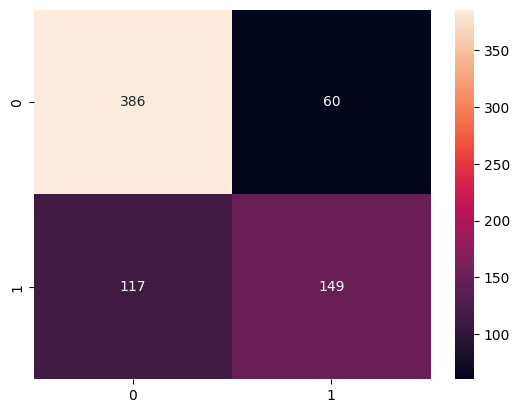

In [11]:
#Train Confusion Matrix
sns.heatmap(confusion_matrix(y_train,train_pred),annot=True,fmt=".0f")

<Axes: >

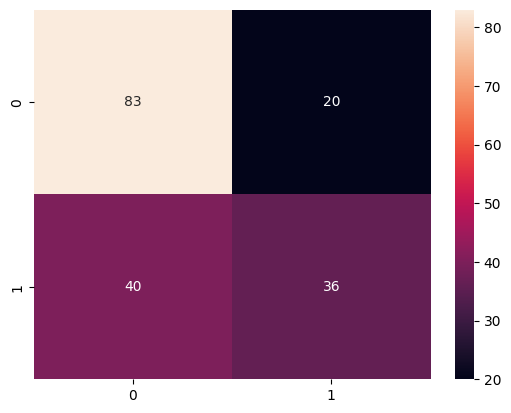

In [12]:
#Test Confusion Matrix
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt=".0f")

In [13]:
print("Train")
print(classification_report(y_train,train_pred))
print("Test")
print(classification_report(y_test,test_pred))

Train
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       446
           1       0.71      0.56      0.63       266

    accuracy                           0.75       712
   macro avg       0.74      0.71      0.72       712
weighted avg       0.75      0.75      0.74       712

Test
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       103
           1       0.64      0.47      0.55        76

    accuracy                           0.66       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.66      0.66      0.65       179

